In [1]:
import numpy as np
from scipy import integrate
from astropy.modeling.blackbody import blackbody_lambda, blackbody_nu, BlackBody1D
from astropy import units as u, constants as c
import matplotlib.pyplot as plt

### Planck function

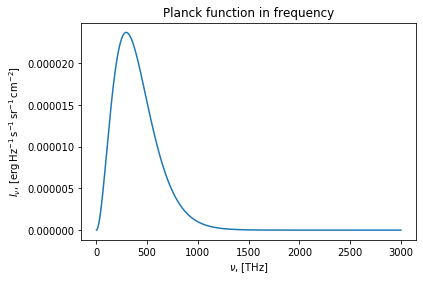

In [2]:
nu = np.linspace(1., 3000., 1000) * u.THz
bb5000K_nu = blackbody_nu(in_x=nu, temperature=5000. * u.Kelvin)
plt.plot(nu, bb5000K_nu)
plt.xlabel(r'$\nu$, [{0:latex_inline}]'.format(nu.unit))
plt.ylabel(r'$I_{\nu}$, ' + '[{0:latex_inline}]'.format(bb5000K_nu.unit))
plt.title('Planck function in frequency')
plt.show()

#### convert frequency to corresponding wavelength 

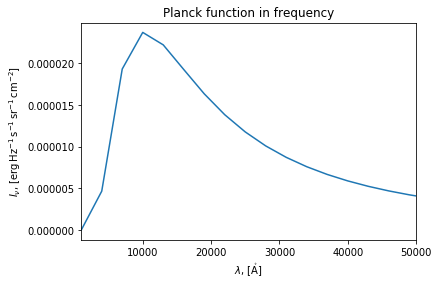

In [8]:
lam = np.linspace(nu.max().to(u.AA, equivalencies=u.spectral()),
                  nu.min().to(u.AA, equivalencies=u.spectral()), 1000)
bb5000K_nu = blackbody_nu(in_x=lam, temperature=5000. * u.Kelvin)
plt.plot(lam, bb5000K_nu)
plt.xlim([1.0e3, 5.0e4])
plt.xlabel(r'$\lambda$, [{0:latex_inline}]'.format(lam.unit))
plt.ylabel(r'$I_{\nu}$, ' + '[{0:latex_inline}]'.format(bb5000K_nu.unit))
plt.title('Planck function in frequency')
plt.show()

### The stellar initial mass function (IMF)

In [9]:
class PowerLawPDF(object):
    def __init__(self, gamma, B=1.):
        self.gamma = gamma
        self.B = B
    def __call__(self, x):
        return x**self.gamma / self.B

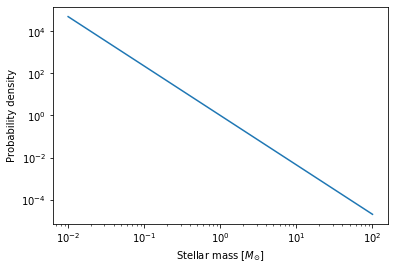

In [11]:
salpeter = PowerLawPDF(gamma=-2.35)
#salpeter.B, _ = integrate.quad(salpeter, a=0.01, b=100.)

m_grid = np.logspace(-2., 2., 100)
plt.loglog(m_grid, salpeter(m_grid))
plt.xlabel(r'Stellar mass [$M_{\odot}$]')
plt.ylabel('Probability density')
plt.show()

### Ratio number of M stars to O stars

In [12]:
n_m, _ = integrate.quad(salpeter, a=.01, b=.6)
n_o, _ = integrate.quad(salpeter, a=15., b=100.)
print(n_m / n_o)

20936.017868485433


### Ratio mass of M stars to O stars

In [13]:
def IMF_m(m, imf):
    return imf(m) * m

m_m, _ = integrate.quad(IMF_m, a=.01, b=.6, args=(salpeter, ))
m_o, _ = integrate.quad(IMF_m, a=15., b=100., args=(salpeter, ))

m_m / m_o

20.29197629921179